<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
dtr = pd.read_csv('/content/SalaryData_Train.csv')
dtr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
dtr.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

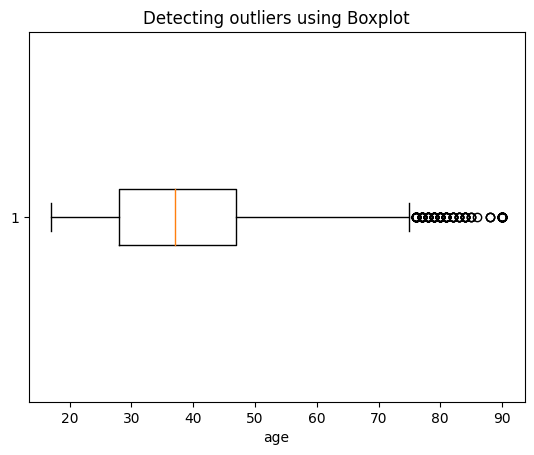

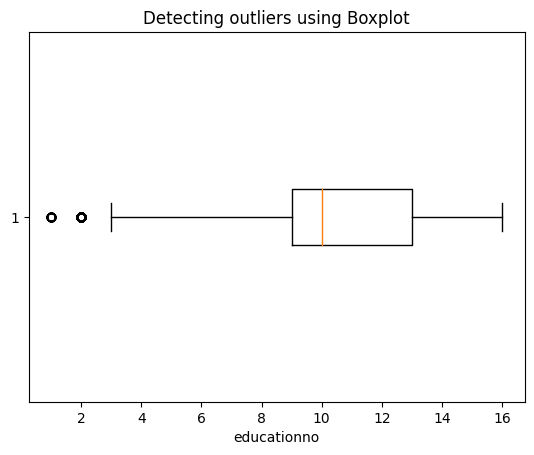

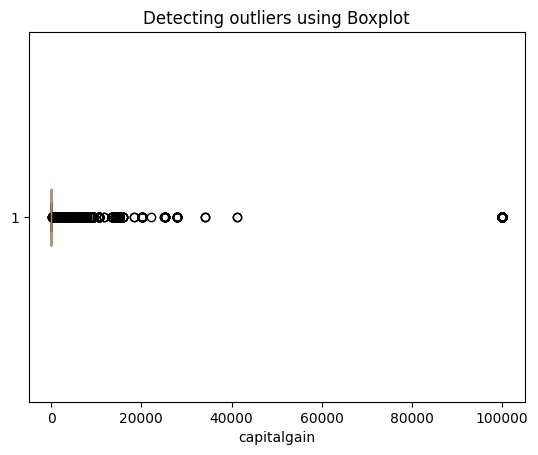

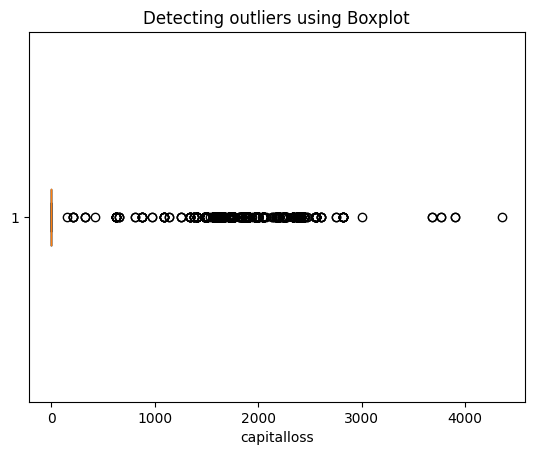

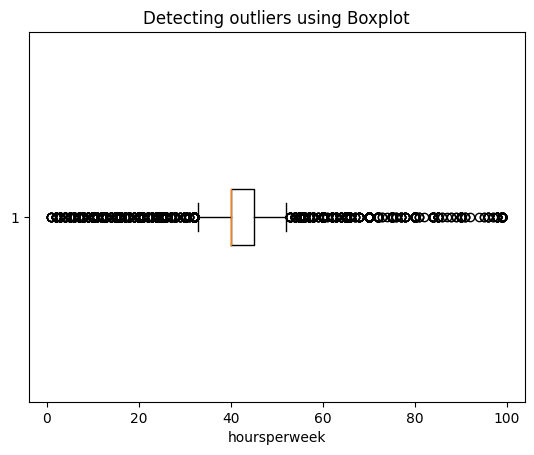

In [4]:
import matplotlib.pyplot as plt
for i in dict(dtr.dtypes):
 if dict(dtr.dtypes)[i] == 'int64' or dict(dtr.dtypes)[i] ==  'float64':
  plt.boxplot(dtr[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [5]:
## Using the zscore to find out no.of outliers

import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers


In [6]:
# detecting the outliers and replacing them with median

for i in dict(dtr.dtypes):
 outliers = []
 if dict(dtr.dtypes)[i] == 'int64' or dict(dtr.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(dtr[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(dtr[i])
   for j in sample_outliers:
    dtr[i] = np.where(dtr[i]==j, median, dtr[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(dtr[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  age
Outliers from Z-scores method:  [79, 90, 81, 78, 90, 88, 90, 90, 78, 80, 90, 81, 81, 80, 90, 79, 81, 90, 90, 80, 90, 90, 79, 78, 79, 84, 90, 80, 90, 81, 83, 84, 79, 85, 82, 79, 90, 90, 84, 78, 78, 80, 90, 90, 84, 90, 90, 90, 78, 81, 78, 82, 81, 80, 90, 80, 84, 82, 78, 79, 90, 84, 90, 83, 78, 80, 78, 79, 80, 79, 80, 90, 90, 90, 81, 83, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 79, 81, 88, 90, 82, 88, 83, 79, 86, 90, 82, 83, 81, 79, 84, 78, 78, 84, 79, 78, 90, 80, 81, 78, 81, 90, 80, 82, 90, 90, 85]
After treatment: 
Outliers from Z-scores method:  [77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0, 77.0]
Column:  educationno
Outliers from Z-scores method:  [1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [18]:
#Encoding

mappings = {}
for i in dict(dtr.dtypes):
 if dict(dtr.dtypes)[i] == 'O':
  mappings[i] = dict(zip(dtr[i].unique(), range(len(dtr[i].unique()))))
  dtr[i] = dtr[i].map(lambda x: mappings[i][x])
dtr

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,0,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,0,13,1,3,2,1,1,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,6,12,1,9,2,0,1,0,0,38,0,0
30157,40,2,1,9,1,8,1,0,0,0,0,40,0,1
30158,58,2,1,9,6,0,4,0,1,0,0,40,0,0
30159,22,2,1,9,0,0,3,0,0,0,0,20,0,0


In [9]:
dte = pd.read_csv('/content/SalaryData_Test.csv')
dte

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
dte.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

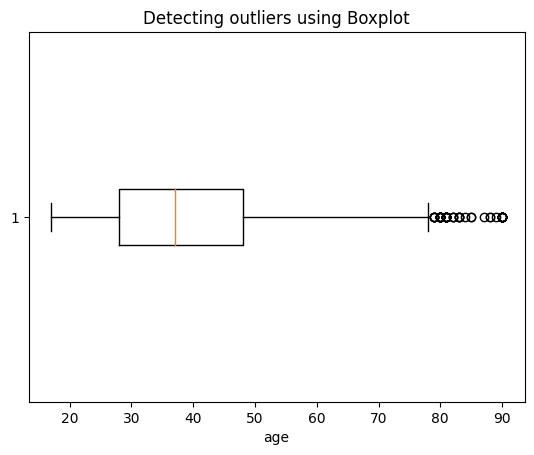

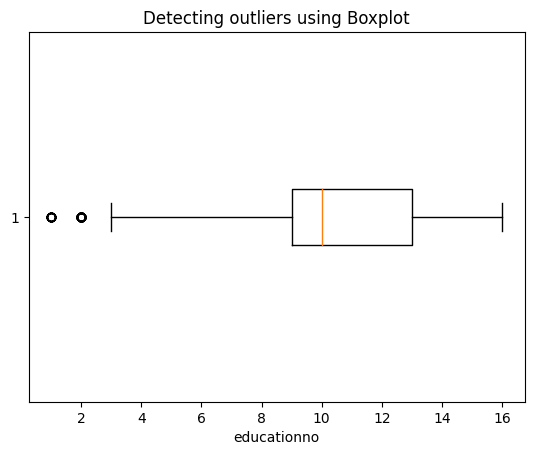

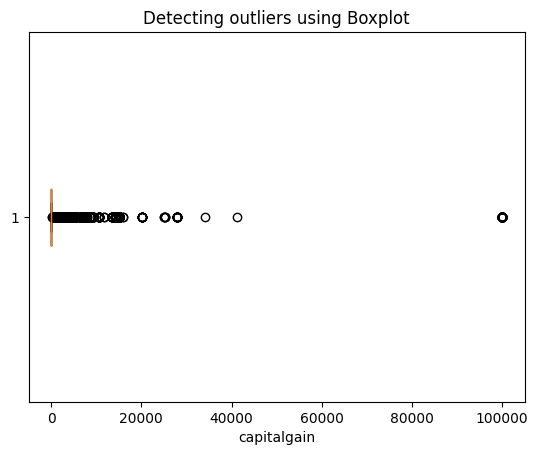

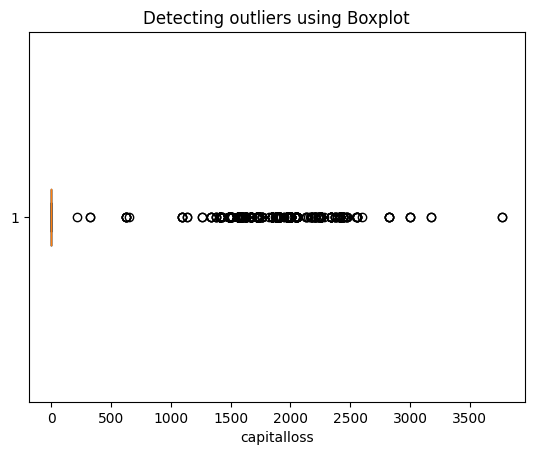

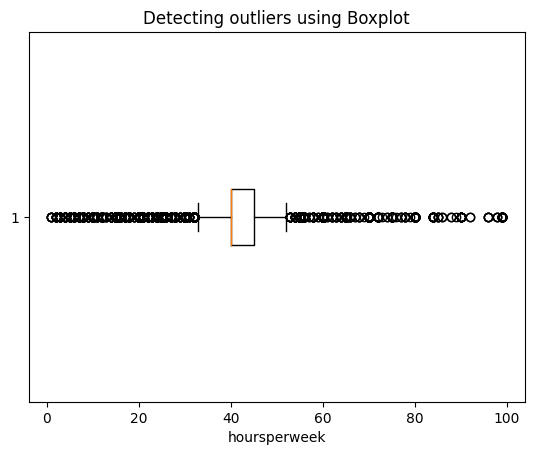

In [11]:
import matplotlib.pyplot as plt
for i in dict(dte.dtypes):
 if dict(dte.dtypes)[i] == 'int64' or dict(dte.dtypes)[i] ==  'float64':
  plt.boxplot(dte[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [13]:
# detecting the outliers and replacing them with median

for i in dict(dtr.dtypes):
 outliers = []
 if dict(dte.dtypes)[i] == 'int64' or dict(dte.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(dte[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(dte[i])
   for j in sample_outliers:
    dte[i] = np.where(dte[i]==j, median, dte[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(dte[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  age
Outliers from Z-scores method:  [80, 90, 80, 81, 82, 81, 85, 80, 90, 81, 89, 83, 81, 82, 80, 90, 81, 83, 90, 90, 80, 80, 81, 90, 85, 90, 81, 81, 80, 79, 81, 80, 88, 87, 90, 79, 83, 79, 80, 79, 81, 81, 90, 82, 90, 81, 88, 80, 81, 80, 81, 90, 84, 80, 80, 83, 79]
After treatment: 
Outliers from Z-scores method:  [78.0, 78.0, 78.0, 78.0, 78.0, 78.0, 78.0]
Column:  educationno
Outliers from Z-scores method:  [2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1]
After treatment: 
Outliers from Z-scores method:  []
Column:  capitalgain
Outliers from Z-scores method:  [27828, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 27828, 25236, 99999, 99999, 99999, 99999, 99999, 27828, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 999

In [15]:
#Encoding

mappings = {}
for i in dict(dte.dtypes):
 if dict(dte.dtypes)[i] == 'O':
  mappings[i] = dict(zip(dte[i].unique(), range(len(dte[i].unique()))))
  dte[i] = dte[i].map(lambda x: mappings[i][x])
dte

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25.0,0,0,7.0,0,0,0,0,0,0.0,0.0,40.0,0,0
1,38.0,0,1,9.0,1,1,1,1,0,0.0,0.0,50.0,0,0
2,28.0,1,2,12.0,1,2,1,1,0,0.0,0.0,40.0,0,1
3,44.0,0,3,10.0,1,0,1,0,0,7688.0,0.0,40.0,0,1
4,34.0,0,4,6.0,0,3,2,1,0,0.0,0.0,30.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33.0,0,7,13.0,0,4,0,1,0,0.0,0.0,40.0,0,0
15056,39.0,0,7,13.0,4,4,2,1,1,0.0,0.0,36.0,0,0
15057,38.0,0,7,13.0,1,4,1,1,0,0.0,0.0,50.0,0,0
15058,44.0,0,7,13.0,4,6,0,4,0,5455.0,0.0,40.0,0,0


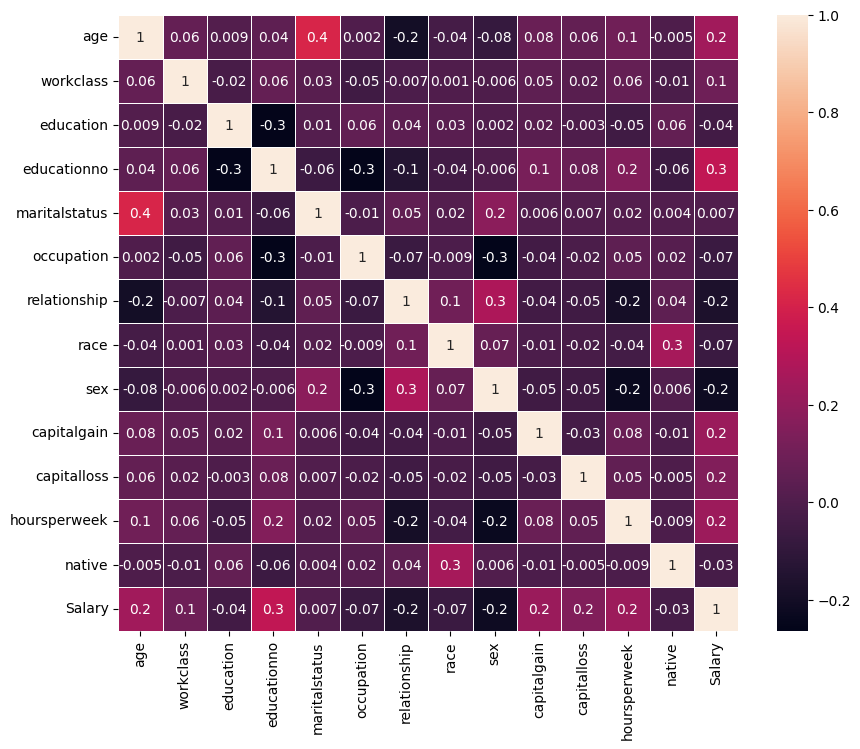

In [19]:
import seaborn as sns
plt.figure(figsize = (10, 8))
corr = dtr.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

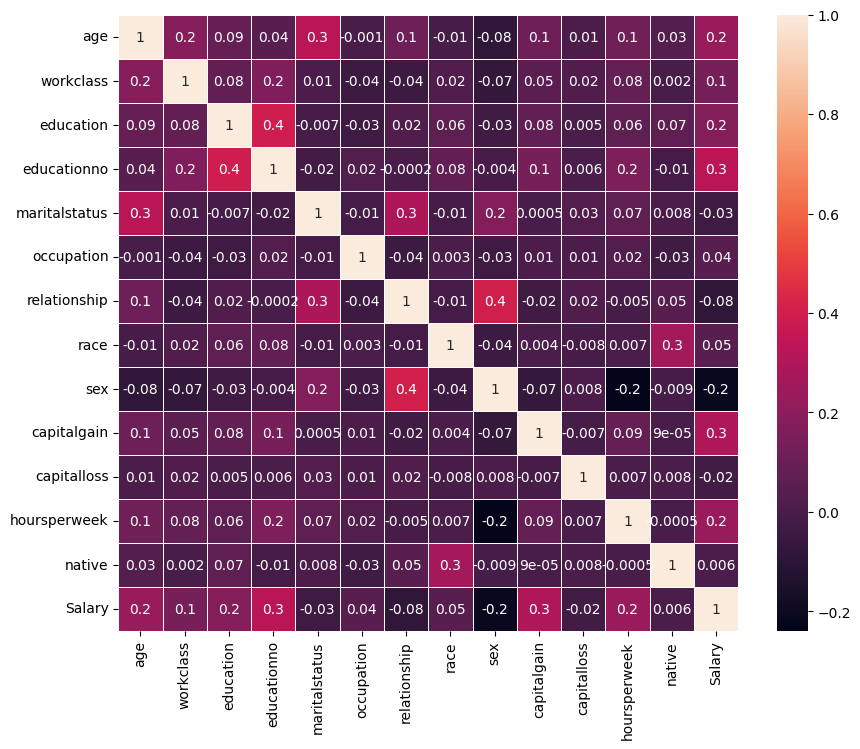

In [20]:
import seaborn as sns
plt.figure(figsize = (10, 8))
corr = dte.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

In [21]:
# Data partition
y_train = dtr['Salary']
x_train = dtr.drop('Salary', axis =1)

y_test = dte['Salary']
x_test = dte.drop('Salary', axis =1)

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
nbc = GaussianNB()
nbc = nbc.fit(x_train, y_train)
predn = nbc.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predn))
print ('\n clasification report:\n', classification_report(y_test, predn))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predn))

Accuracy: 0.7893094289508632

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     11360
           1       0.74      0.22      0.34      3700

    accuracy                           0.79     15060
   macro avg       0.77      0.60      0.61     15060
weighted avg       0.78      0.79      0.74     15060


 confussion matrix:
 [[11071   289]
 [ 2884   816]]
